# **DATA MINING**


### **Tasks**: 
**Pre-processing**
- - - 
- EDA 
- Feature Selection
- Standardize 
- Detect Global Outliers
- Normalize
- Feature Extraction with **`PCA`**
- PCA Features Contribution to Cumulative Explained Variance 
<br><br>


**Clustering**
- - - 
- **`Silhouette Analysis`** for Finding the Optimal Number of Clusters
- **`Clustering`** with K-Means and Gaussian Mixture Algorithms
- Choose between K-Means and Gaussian Mixture to Predict the Labels<br><br>
**Classification**
- - - 
- **`Classification`** with **`K-NN`** and **`SVM`**, using **`Hyperparameter Tuning`** with  **`GridSeachCV`**
- Classification Report
- Heatmap of Confusion Matrix for Test data





#### The data is a **subset** of publicly available (from https://www.meteoblue.com/) data about climate in **Basel**, Switzerland, which contains **1763** records of data (for **18 features**) from the **summer** and the **winter seasons** from 2010 to 2019 period and can be found [here](https://github.com/josepaulosa/Data_Mining/blob/main/Data.txt). <br><br>The meaning of each column of data is listed bellow:
- Temperature (Min) ºC.
- Temperature (Max) ºC.
- Temperature (Mean) ºC.
-	Relative Humidity (Min) %.
-	Relative Humidity (Max) %.
-	Relative Humidity (Mean) %.
-	Sea Level Pressure (Min) hPa.
-	Sea Level Pressure (Max) hPa.
-	Sea Level Pressure (Mean) hPa.
-	Precipitation Total mm.
-	Snowfall Amount cm.
-	Sunshine Duration min.
-	Wind Gust (Min) Km/h.
-	Wind Gust (Max) Km/h.
-	Wind Gust (Mean) Km/h.
-	Wind Speed (Min) Km/h.
- Wind Speed (Max) Km/h.
- Wind Speed (Mean) Km/h<br><br>


## 1. **Pre-processing**
- - - 

#### **Import required libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.offline as py
import plotly.express as px
from google.colab import drive
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score, confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import sys
import os
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore" 

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
temperature_columns = ["Temperature (Min) ºC.", "Temperature (Max) ºC.", "Temperature (Mean) ºC."]
humidity_columns = ["Relative Humidity (Min) %", "Relative Humidity (Max) %", "Relative Humidity (Mean) %"]
sea_level_columns = ["Sea Level Pressure (Min) hPa", "Sea Level Pressure (Max) hPa", "Sea Level Pressure (Mean) hPa"]
other_columns = ["Precipitation Total mm", "Snowfall Amount cm", "Sunshine Duration min"]
wind_gust_columns = ["Wind Gust (Min) Km/h", "Wind Gust (Max) Km/h", "Wind Gust (Mean) Km/h"]
wind_speed_columns = ["Wind Speed (Min) Km/h", "Wind Speed (Max) Km/h", "Wind Speed (Mean) Km/h"]
columns = temperature_columns + humidity_columns + sea_level_columns + \
          other_columns + wind_gust_columns + wind_speed_columns

#### **Read the dataset**


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data.txt', sep=",", header=0, names = columns)

In [ ]:
df.head()

,Temperature (Min) ºC.,Temperature (Max) ºC.,Temperature (Mean) ºC.,Relative Humidity (Min) %,Relative Humidity (Max) %,Relative Humidity (Mean) %,Sea Level Pressure (Min) hPa,Sea Level Pressure (Max) hPa,Sea Level Pressure (Mean) hPa,Precipitation Total mm,Snowfall Amount cm,Sunshine Duration min,Wind Gust (Min) Km/h,Wind Gust (Max) Km/h,Wind Gust (Mean) Km/h,Wind Speed (Min) Km/h,Wind Speed (Max) Km/h,Wind Speed (Mean) Km/h
0,11.110529,18.490528,14.988861,59,94,76.458336,1013.9,1016.6,1014.99170,1.9,0.0,287.23404,6.479999,25.199999,14.880001,4.161301,16.285300,8.616541
1,10.320529,18.170528,14.267612,71,96,83.583336,1015.3,1017.5,1016.38745,0.1,0.0,126.26506,3.240000,24.119999,12.764999,2.028842,11.289829,6.372418
2,10.450529,24.980530,17.309278,54,92,77.625000,1015.9,1018.7,1017.26250,0.0,0.0,881.24710,2.160000,20.160000,9.480000,0.799200,11.483046,4.690738
3,12.350529,25.610529,19.881780,47,88,66.583336,1015.7,1020.7,1018.18353,0.0,0.0,951.56665,0.720000,15.840000,5.565001,0.376746,6.443357,3.311275
4,17.690529,26.250528,21.623444,57,91,69.500000,1012.6,1015.7,1014.59160,1.1,0.0,440.98970,1.080000,41.760002,13.500000,1.787066,16.802220,6.217993


#### **Comment:** The data is **unlabeled**.<br><br>

#### **Descriptive statistics**

In [ ]:
df.describe()

,Temperature (Min) ºC.,Temperature (Max) ºC.,Temperature (Mean) ºC.,Relative Humidity (Min) %,Relative Humidity (Max) %,Relative Humidity (Mean) %,Sea Level Pressure (Min) hPa,Sea Level Pressure (Max) hPa,Sea Level Pressure (Mean) hPa,Precipitation Total mm,Snowfall Amount cm,Sunshine Duration min,Wind Gust (Min) Km/h,Wind Gust (Max) Km/h,Wind Gust (Mean) Km/h,Wind Speed (Min) Km/h,Wind Speed (Max) Km/h,Wind Speed (Mean) Km/h
count,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000
mean,8.739138,16.778849,12.716937,54.088536,86.999432,71.036630,1014.691827,1020.365607,1017.577424,1.503632,0.068053,399.195825,7.237593,30.468217,17.570124,2.933495,14.861291,8.419848
std,7.805901,9.650489,8.791033,12.952457,7.891405,10.013695,8.850681,8.016272,8.284536,3.497564,0.514078,294.742242,8.223633,16.495244,11.507308,3.471646,7.872767,5.206912
min,-12.519471,-4.389471,-7.628222,19.000000,53.000000,38.333332,976.100000,981.400000,978.450000,0.000000,0.000000,0.000000,0.000000,4.320000,2.715000,0.000000,2.881557,1.495064
25%,1.695529,8.200529,4.687821,44.000000,82.000000,63.510417,1010.300000,1015.900000,1013.231325,0.000000,0.000000,123.724200,2.160000,19.080000,9.757499,0.842431,9.304952,4.871309
50%,10.230529,17.400530,14.633654,54.000000,88.000000,72.000000,1014.600000,1019.500000,1016.956170,0.000000,0.000000,387.787200,4.320000,26.280000,14.145001,1.864800,12.988194,6.941605
75%,15.530529,25.190529,20.433550,64.000000,93.000000,78.750000,1019.300000,1024.400000,1021.761427,1.200000,0.000000,619.203330,8.910000,37.440000,21.678751,3.729600,18.398964,10.111403
max,25.820530,36.700527,30.425112,93.000000,100.000000,95.250000,1043.600000,1049.900000,1047.095800,37.399994,13.860001,962.283300,57.960000,133.200000,90.749990,26.673279,59.192370,36.360706


In [ ]:
df.shape

(1762, 18)

#### **Check if there is any null data**

In [ ]:
df.isnull().sum()

Temperature (Min) ºC.            0
Temperature (Max) ºC.            0
Temperature (Mean) ºC.           0
Relative Humidity (Min) %        0
Relative Humidity (Max) %        0
Relative Humidity (Mean) %       0
Sea Level Pressure (Min) hPa     0
Sea Level Pressure (Max) hPa     0
Sea Level Pressure (Mean) hPa    0
Precipitation Total mm           0
Snowfall Amount cm               0
Sunshine Duration min            0
Wind Gust (Min) Km/h             0
Wind Gust (Max) Km/h             0
Wind Gust (Mean) Km/h            0
Wind Speed (Min) Km/h            0
Wind Speed (Max) Km/h            0
Wind Speed (Mean) Km/h           0
dtype: int64

#### **Histograms of variables**


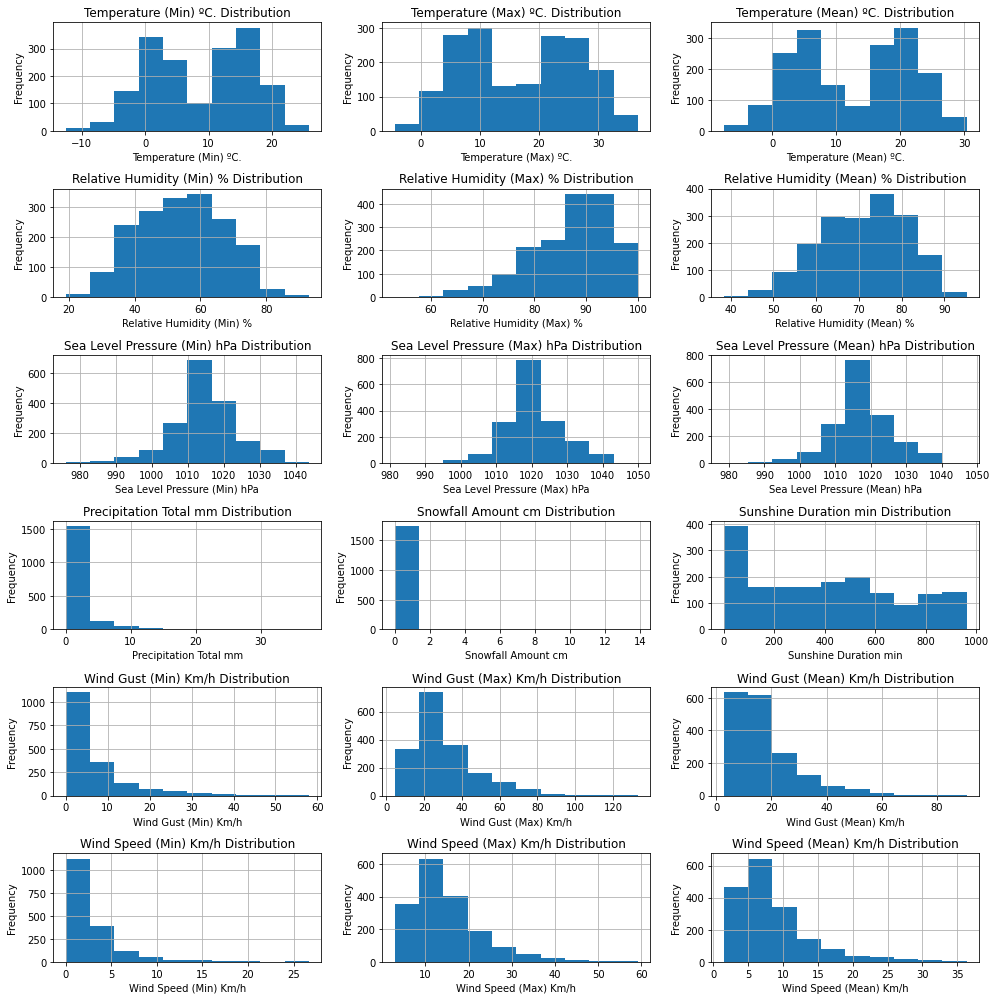

In [ ]:
def plot_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize =(14,14))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=10,ax=ax)
        ax.set_title(var_name+" Distribution")
        plt.xlabel(var_name)
        plt.ylabel("Frequency")
    fig.tight_layout()  
    plt.show()

plot_histograms(df, df.columns, 6, 3)

#### **Comments**: 
- Regarding **temperature**, histograms show a **bimodal distribution** due to **seasonality**. 
- On **most** days, **there wasn't snowfall** and **low or even no precipitation**.  
- **Relative humidity** and **seal level pressure** have an **approximate simetric distribution**. 
-  In what concerns to **almost all wind** statistics (min, mean and max) they are **skewed to the right**.<br><br>

#### **Function to plot seaborn heatmap of correlation between all features**

In [ ]:
def features_corr(df, figsize = (16, 12), title = False):
    f, ax = plt.subplots(figsize=figsize)

    corr = df.corr()

    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    np.fill_diagonal(mask, False)

    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    sns.heatmap(corr, mask=mask, cmap=cmap,vmax=1, center=0,
                     square=True, linewidths=.5, cbar_kws={"shrink": .5},
                annot=True);
    if title:
        ax.set_title(title);

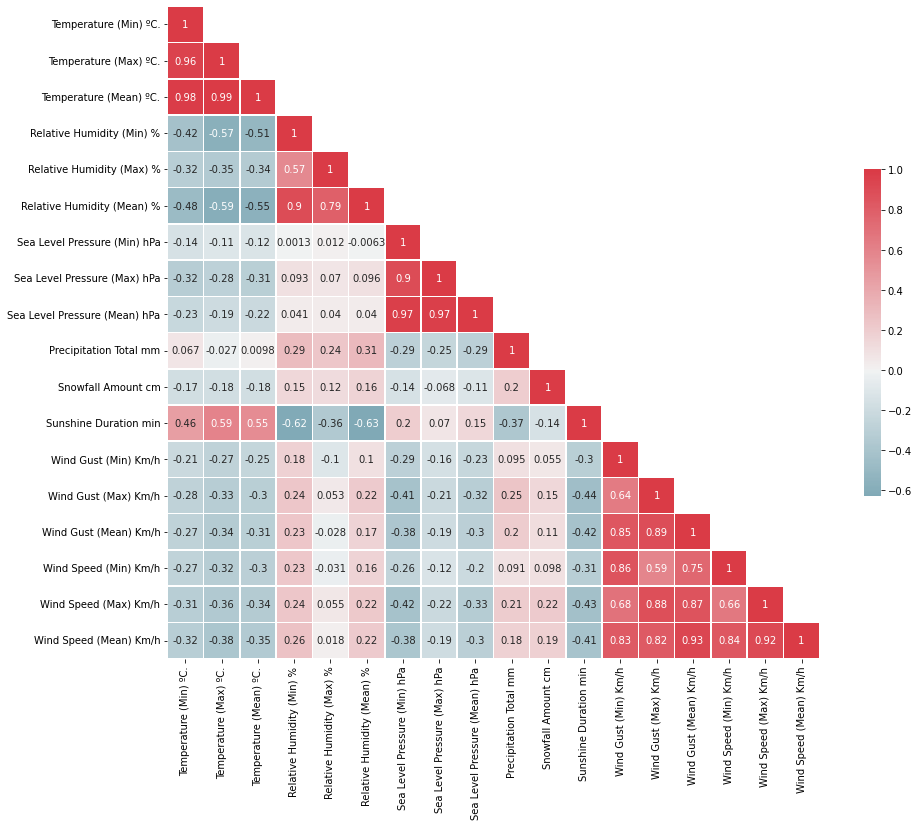

In [ ]:
features_corr(df)

#### **Comments:**
- **Variables** that **represent** the **same factor** in **determining** the **weather** - like **`Temperature`** - with values for `Min`, `Mean` and `Max`, have a **high positive correlation**, which **indicates** that we **should not  use all** of the **available variables** to **avoid multicollinearity**, therefore, **only the mean** will be **kept** in these cases. 
- In **addition**, because **wind speed** and **wind gust** are **highly correlated**, **only mean wind speed will be kept**; mean wind speed was chosen over mean wind gust **because all correlations of mean wind speed with other wind variables are greater than 0.8**.<br><br>

#### **Feature selection**:


In [ ]:
reduced_columns = ["Temperature (Mean) ºC.", "Relative Humidity (Mean) %", "Sea Level Pressure (Mean) hPa", "Precipitation Total mm", "Snowfall Amount cm", "Sunshine Duration min", "Wind Speed (Mean) Km/h" ]
df_reduced = df[reduced_columns]

df_reduced.head()

,Temperature (Mean) ºC.,Relative Humidity (Mean) %,Sea Level Pressure (Mean) hPa,Precipitation Total mm,Snowfall Amount cm,Sunshine Duration min,Wind Speed (Mean) Km/h
0,14.988861,76.458336,1014.99170,1.9,0.0,287.23404,8.616541
1,14.267612,83.583336,1016.38745,0.1,0.0,126.26506,6.372418
2,17.309278,77.625000,1017.26250,0.0,0.0,881.24710,4.690738
3,19.881780,66.583336,1018.18353,0.0,0.0,951.56665,3.311275
4,21.623444,69.500000,1014.59160,1.1,0.0,440.98970,6.217993


#### **Function to Standardize, Remove Outliers and Normalise to `[0, 1]`**

In [ ]:
def standardize_remove_outliers_and_normalize_data(input_dataframe):
    input_dataframe = input_dataframe.copy()
    columns = input_dataframe.columns    
    
    scaler = StandardScaler()
    output_dataframe = pd.DataFrame(scaler.fit_transform(input_dataframe))
    output_dataframe.columns = columns
    
    inicial_count = output_dataframe.count()[0]
    outliers = 0
    
    for column in columns:
        outliers += output_dataframe[(output_dataframe[column] < -3) | (3 < output_dataframe[column])][column].count()
        output_dataframe = output_dataframe[(-3 <= output_dataframe[column]) & (output_dataframe[column] <= 3)]
        min_ = output_dataframe[column].min()
        max_ = output_dataframe[column].max()
        output_dataframe[column] = (output_dataframe[column] - min_)/(max_ - min_) # ISTO É O DATASET "NORMALIZED"
        
    final_count = output_dataframe.count()[0]
    print("Found {} outliers observations, that corresponds to {:.2f}% of the inicial dataframe."\
          .format(outliers, 100 * outliers/inicial_count))
    print("The new dataframe has {} observations".format(final_count))
        
    return output_dataframe    

### **Apply the function to our dataframe with the selected columns only** 

In [ ]:
df_processed_reduced = standardize_remove_outliers_and_normalize_data(df_reduced)
df_processed_reduced.describe()

Found 112 outliers observations, that corresponds to 6.36% of the inicial dataframe.
The new dataframe has 1650 observations


,Temperature (Mean) ºC.,Relative Humidity (Mean) %,Sea Level Pressure (Mean) hPa,Precipitation Total mm,Snowfall Amount cm,Sunshine Duration min,Wind Speed (Mean) Km/h
count,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000
mean,0.543202,0.542367,0.501906,0.084742,0.015120,0.434405,0.282557
std,0.231301,0.182284,0.157043,0.177468,0.091701,0.303828,0.187758
min,0.000000,0.000000,0.000003,0.000000,0.000000,0.000000,0.000000
25%,0.328511,0.406467,0.411265,0.000000,0.000000,0.164029,0.147485
50%,0.597977,0.556197,0.482747,0.000000,0.000000,0.433816,0.235400
75%,0.745902,0.682063,0.583836,0.075630,0.000000,0.660409,0.361069
max,1.000000,0.955350,1.000000,1.000000,1.000000,1.000000,1.000000


### **Extraction** of **new**, **orthogonal (independent) features**, which are a **linear combination of the original ones** (which carry a clear physical meaning, such as temperature or precipitation)**: PCA**<br><br>


#### **Instantiate** the **PCA** model
 

In [ ]:
number_of_components = 3

pca = PCA(n_components=number_of_components)

#### **Fit** the dataset

In [ ]:
pca.fit(df_processed_reduced)

PCA(n_components=3)

#### **PCA features contribution to cumulative explained variance**

Contribution of each of the 3 principal components to the explained variance: [0.51605154 0.17946354 0.1102755 ]
PCA features total contribution to explained variance: 0.8057905801517472


Text(0, 0.5, 'Cumulative Variance Explained')

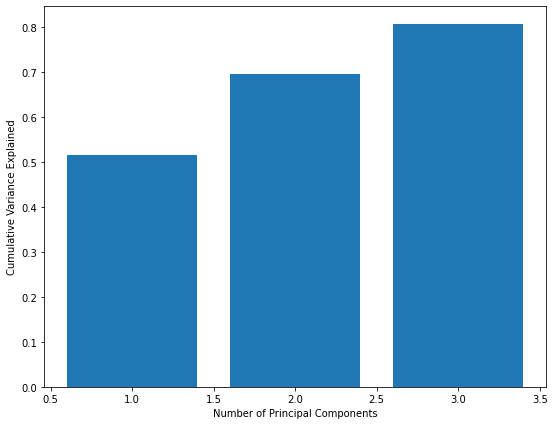

In [ ]:
df_processed_reduced_projected = pca.transform(df_processed_reduced)

print('Contribution of each of the 3 principal components to the explained variance:', pca.explained_variance_ratio_)
print('PCA features total contribution to explained variance:',sum(pca.explained_variance_ratio_))

# Plot cumulative explained variance for all PCs
cum_exp_var = []
var_exp = 0
for i in pca.explained_variance_ratio_:
      var_exp += i
      cum_exp_var.append(var_exp)

fig, ax = plt.subplots(figsize=(9,7))
ax.bar(range(1,pca.components_.shape[0]+1), cum_exp_var)
ax.set_xlabel('Number of Principal Components')
ax.set_ylabel('Cumulative Variance Explained')

In [ ]:
# Rename the dataframes
adjusted_df = df_processed_reduced
adjusted_projected = df_processed_reduced_projected

## 2 - **Clustering**
- - - 

### **Silhouette analysis for finding the optimal number of clusters:**

- The silhouette coefficient is a **measure** of how **similar** data points are **within-cluster** (cohesion) **compared to other clusters** (separation). 
- The **optimal number of clusters** '**n**' is **the one that maximizes** the **average silhouette over a range of possible values for 'n'**.<br><br>

#### **Silhouette analysis: `K-Means`**

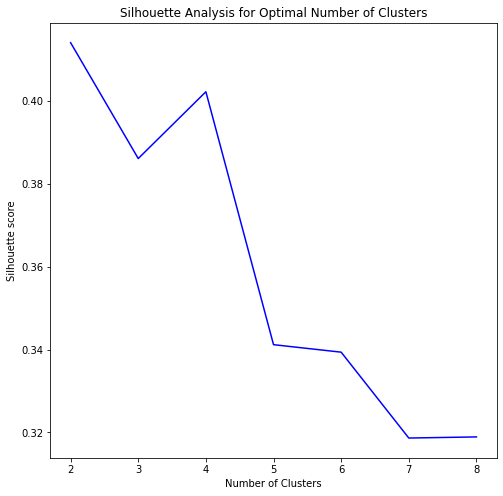

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
    # initialize kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    # Fit
    kmeans= kmeans.fit(adjusted_projected)
    # Predict
    k_labels = kmeans.labels_
 
    # silhouette score
    silhouette_avg.append(silhouette_score(adjusted_projected, k_labels, metric='euclidean'))
# plot
fig=plt.figure(figsize =(8,8))
plt.plot(range_n_clusters,silhouette_avg,'b')
plt.xlabel('Number of Clusters') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette Analysis for Optimal Number of Clusters')
plt.show()

#### **Comment:** the **optimal number of clusters** is **2**<br><br>

### **Silhouette analysis: `Gaussian Mixture`**

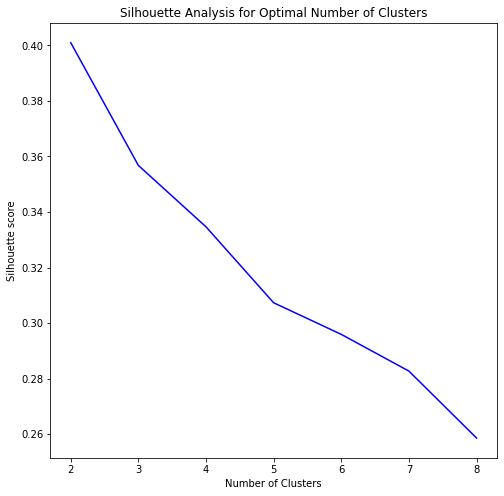

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
    # initialize gaussian mixture with its parameters
    model = GaussianMixture(n_components=num_clusters, max_iter=200, init_params='kmeans')
    # fit the model and predict
    labels = model.fit_predict(adjusted_projected)
    
    # silhouette score
    silhouette_avg.append(silhouette_score(adjusted_projected, labels, metric='euclidean'))
# plot
fig=plt.figure(figsize =(8,8))
plt.plot(range_n_clusters,silhouette_avg,'b')
plt.xlabel('Number of Clusters') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette Analysis for Optimal Number of Clusters')
plt.show()

#### **Comment:** the **optimal number of clusters** is **2**<br><br>

### **Clustering**: **`Gaussian Mixture`**

In [ ]:
clusters = 2

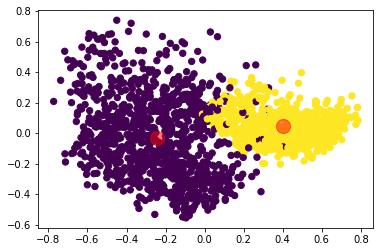

In [ ]:
gmm = GaussianMixture(n_components=clusters, random_state=0).fit(adjusted_projected)
gm_labels = gmm.predict(adjusted_projected)
plt.scatter(adjusted_projected[:, 0], adjusted_projected[:, 1], c=gm_labels, s=40, cmap='viridis')

# plot the centers of each cluster
centers = gmm.means_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [ ]:
def make_3d_pca_plot(matrix_coeff, size, text=None, color = None):
    xs = matrix_coeff[:,0]
    ys = matrix_coeff[:,1]
    zs = matrix_coeff[:,2]
    fig = go.Figure()
    fig.add_trace(go.Scatter3d(
        x=xs,
        y=ys,
        z=zs,
        name="z",
        mode="markers",
        marker=dict(
                color=color,
                size=size)
    ))
    if text is not None:
        fig.add_trace(go.Scatter3d(
            x=xs,
            y=ys,
            z=zs,
            name="z",
            mode="text",
            text= text
        ))
    return fig

In [ ]:
make_3d_pca_plot(adjusted_projected, size = 3, text = None, color = gm_labels)

### **Clustering**: **`Kmeans`**

In [ ]:
kmeans = KMeans(n_clusters=clusters, random_state=0).fit(adjusted_projected)

In [ ]:
k_labels = kmeans.labels_

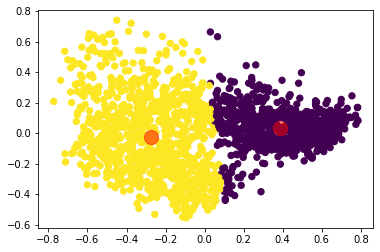

In [ ]:
plt.scatter(adjusted_projected[:, 0], adjusted_projected[:, 1], c=k_labels, s=40, cmap='viridis')

# plot the centers of each cluster
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

In [ ]:
make_3d_pca_plot(adjusted_projected, size = 2, text = None, color = k_labels)

####  **Comment:** **generally speaking, there are some advantages of using Gaussian Mixture over K-Means**. However, **in this case**, we are going to **choose K-Means** because it seems that K-Means **delimits better the clusters** than the Gaussian Mixture, as **shown** in the above **scatter plots**<br><br>


 

In [ ]:
final_labels = k_labels
adjusted_df["label"] = final_labels

adjusted_df.head()

,Temperature (Mean) ºC.,Relative Humidity (Mean) %,Sea Level Pressure (Mean) hPa,Precipitation Total mm,Snowfall Amount cm,Sunshine Duration min,Wind Speed (Mean) Km/h,label
0,0.594352,0.652810,0.436635,0.159664,0.0,0.298492,0.317946,1
1,0.575399,0.784450,0.465320,0.008403,0.0,0.131214,0.217755,1
2,0.655330,0.674365,0.483303,0.000000,0.0,0.915788,0.142674,0
3,0.722933,0.470362,0.502232,0.000000,0.0,0.988863,0.081087,0
4,0.768702,0.524249,0.428413,0.092437,0.0,0.458274,0.210860,0


#### Below is shown the **average** and **standard deviation** for the chosen variables **grouped by labels**<br><br>


In [ ]:
adjusted_df.groupby("label").mean()

,Temperature (Mean) ºC.,Relative Humidity (Mean) %,Sea Level Pressure (Mean) hPa,Precipitation Total mm,Snowfall Amount cm,Sunshine Duration min,Wind Speed (Mean) Km/h
label,,,,,,,
0,0.743367,0.401216,0.485848,0.028240,0.000000,0.717454,0.199858
1,0.401116,0.642562,0.513304,0.124849,0.025852,0.233484,0.341261


In [ ]:
adjusted_df.groupby("label").std()

,Temperature (Mean) ºC.,Relative Humidity (Mean) %,Sea Level Pressure (Mean) hPa,Precipitation Total mm,Snowfall Amount cm,Sunshine Duration min,Wind Speed (Mean) Km/h
label,,,,,,,
0,0.125684,0.135664,0.093448,0.085436,0.000000,0.185825,0.110681
1,0.177843,0.139902,0.188886,0.211699,0.118771,0.189907,0.208091


#### **Comparing cluster 0 with cluster 1**:

- When **comparing cluster 0 with cluster 1**, it is **noticeable** that **data points in cluster 0** have **higher mean temperatures**, **lower mean relative humidity**, **lower total precipitation**, **substantial more sunshine duration** and **lower wind speed** and **no snowfall**.<br><br>
- From the **comparison between cluster 0 and 1**, and considering that the data is a subset of data about climate in Basel, Switzerland, containing **records of data** from the **summer and the winter seasons**, we could **associate cluster 0 with typical summer days** and **cluster 1 with typical winter days** of the city of **Basel**.<br><br>
- - - 



In [ ]:
df_to_classify = pd.DataFrame(adjusted_projected, columns = ["x1", "x2", "x3"])
df_to_classify["label"] = final_labels
df_to_classify["label"] = df_to_classify["label"]

df_to_classify.head()

,x1,x2,x3,label
0,-0.140519,0.128719,-0.048243,1
1,-0.270158,0.027829,-0.174182,1
2,0.418288,-0.116670,-0.071323,0
3,0.592043,-0.090656,-0.059949,0
4,0.143611,0.160800,-0.084077,0


#### **Only after clustering our data and saving the resulting cluster labels, can we train the classifiers using these labels as a target variable. By saving the labels we effectively seperate the steps of clustering and classification**.<br><br>
- - - 

## 3 - **Classification**<br><br>
- - - 

#### **Function** for **Evaluating the Models**

In [ ]:
def evaluate(y_test, predictions):
    cf_matrix = confusion_matrix(y_test, predictions)
    sns.heatmap(cf_matrix, annot = True, fmt = 'd',cmap="Blues")
    plt.title('Heatmap of Confusion Matrix for Test data')
    plt.ylabel('TRUE LABEL')
    plt.xlabel('PREDICTED LABEL')     
    
    print("Precision Score of the model:", precision_score(y_test,predictions)*100)
    print("Recall Score of the model:", recall_score(y_test,predictions)*100)
    print("Acuracy score of the model:",accuracy_score(y_test,predictions)*100)
    print("F1 score of the model:",f1_score(y_test,predictions)*100)

#### **Train-Test Split**

In [ ]:
X = df_to_classify[df_to_classify.columns[:-1]]
y = df_to_classify["label"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape

(1320, 3)

In [ ]:
X_test.shape

(330, 3)

#### **K-NN Classifier using Hyperparameter Tuning** with  **GridSeachCV:**

In [ ]:
%%time
neigh = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 25)}
neigh_gscv = GridSearchCV(neigh, param_grid, cv=5)
neigh_gscv.fit(X_train, y_train)

CPU times: user 1.78 s, sys: 35.2 ms, total: 1.82 s
Wall time: 1.78 s


In [ ]:
print('Best number of neighbors:', neigh_gscv.best_estimator_.get_params()['n_neighbors'])

Best number of neighbors: 6


In [ ]:
neigh_predict = neigh_gscv.predict(X_test)

In [ ]:
print(classification_report(neigh_predict, y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       151
           1       0.99      0.99      0.99       179

    accuracy                           0.99       330
   macro avg       0.99      0.99      0.99       330
weighted avg       0.99      0.99      0.99       330



Precision Score of the model: 98.88268156424581
Recall Score of the model: 98.88268156424581
Acuracy score of the model: 98.7878787878788
F1 score of the model: 98.88268156424581


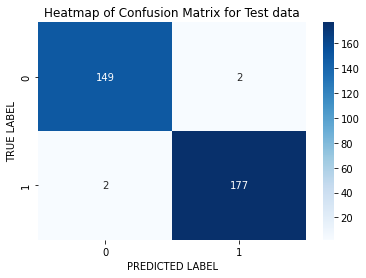

In [ ]:
evaluate(y_test, neigh_predict)

#### **SVM Classifier using Hyperparameter Tuning** with  **GridSeachCV:**

In [ ]:
%%time
svm_classifier = svm.SVC(random_state=123)
param_grid_svm = [
    {'kernel':('linear', 'rbf')},
    {'C':[ 0.8, 1, 1.2, 1.4, 1.5, 1.6]},
]    
svm_gscv = GridSearchCV(svm_classifier, param_grid_svm, cv=5)
svm_gscv.fit(X_train, y_train)

CPU times: user 499 ms, sys: 0 ns, total: 499 ms
Wall time: 500 ms


In [ ]:
print('Best KERNEL:', svm_gscv.best_estimator_.get_params()['kernel'])
print('Best C:', svm_gscv.best_estimator_.get_params()['C'])

Best KERNEL: rbf
Best C: 1.5


In [ ]:
svm_predict = svm_gscv.predict(X_test)

In [ ]:
print(classification_report(svm_predict, y_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       147
           1       1.00      0.98      0.99       183

    accuracy                           0.99       330
   macro avg       0.99      0.99      0.99       330
weighted avg       0.99      0.99      0.99       330



Precision Score of the model: 97.81420765027322
Recall Score of the model: 100.0
Acuracy score of the model: 98.7878787878788
F1 score of the model: 98.89502762430939


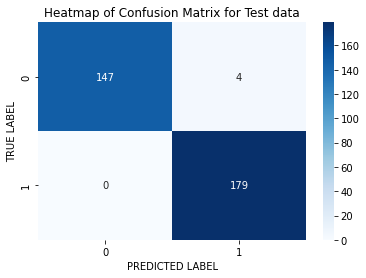

In [ ]:
evaluate(y_test, svm_predict)

### **Conclusions:**  
- We managed to **clearly identify** 2 **distinct groups of data points** - **clusters** - **within** the **dataset** (**summer** and **winter** days). 
- **Using** the **resulting cluster labels** we **trained 2 classifiers**  using **hyperparameter tuning** with  **GridSeachCV** which allowed us to **achieve very high values** for **all the metrics considered**, being F1 score the most important for us. 
- The **F1 score** for **both classifiers** - using **`Hyperparameter Tuning`** with  **`GridSeachCV`** - is **very similar**.




